# Corona Virus Project

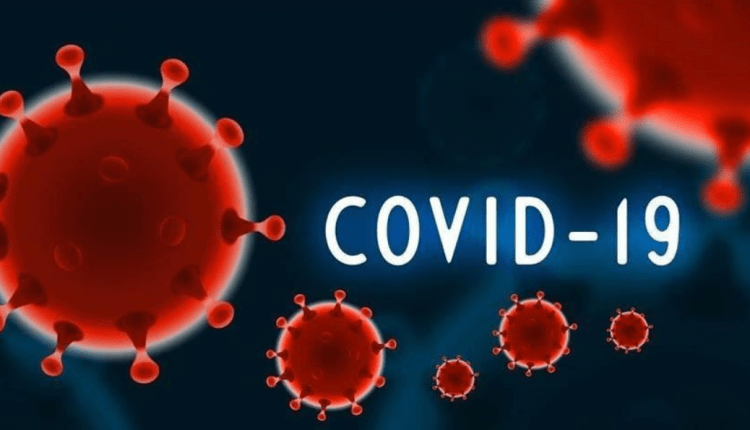

In [16]:
### Graphical of Corona Virus

import os
from IPython.display import Image
PATH = "E:\Study\PowerBI\Power_BI_Projects_Practice\Project_1\Image\\"
Image(filename = PATH + "covid.png", width=600, height=300)

In [17]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from datetime import datetime

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed

In [19]:
# Loading the cumulative raw data

raw_data_confirmed = pd.read_csv('E:\\Study\\PowerBI\\Power_BI_Projects_Practice\\Project_1\\Source_Code\\Data\\time_series_covid19_confirmed_global.csv')
raw_data_deaths = pd.read_csv('E:\\Study\\PowerBI\\Power_BI_Projects_Practice\\Project_1\\Source_Code\\Data\\time_series_covid19_deaths_global.csv')
raw_data_Recovered = pd.read_csv('E:\\Study\\PowerBI\\Power_BI_Projects_Practice\\Project_1\\Source_Code\\Data\\time_series_covid19_recovered_global.csv')

print("The Shape of Cornirmed is: ", raw_data_confirmed.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered.shape)

raw_data_confirmed.head()

The Shape of Cornirmed is:  (266, 138)
The Shape of Cornirmed is:  (266, 138)
The Shape of Cornirmed is:  (253, 138)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,763,763,763,763,764,764,764,765,844,851
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,70,70,71,74,81,84,86,86,86,86


In [23]:
raw_data_Recovered[raw_data_Recovered['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,379157,384902,391508,399991,406446,416461,444758,458231,463868,479258


In [24]:
# Un-Pivoting the data

raw_data_confirmed2 = pd.melt(raw_data_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_deaths2 = pd.melt(raw_data_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_Recovered2 = pd.melt(raw_data_Recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])


print("The Shape of Cornirmed is: ", raw_data_confirmed2.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths2.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered2.shape)


raw_data_confirmed2.head()

The Shape of Cornirmed is:  (35644, 6)
The Shape of Cornirmed is:  (35644, 6)
The Shape of Cornirmed is:  (33902, 6)


,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [25]:
# Converting the new column to dates

raw_data_confirmed2['Date'] = pd.to_datetime(raw_data_confirmed2['Date'])
raw_data_deaths2['Date'] = pd.to_datetime(raw_data_deaths2['Date'])
raw_data_Recovered2['Date'] = pd.to_datetime(raw_data_Recovered2['Date'])


In [26]:
# Renaming the Values
raw_data_confirmed2.columns = raw_data_confirmed2.columns.str.replace('value', 'Confirmed')
raw_data_deaths2.columns = raw_data_deaths2.columns.str.replace('value', 'Deaths')
raw_data_Recovered2.columns = raw_data_Recovered2.columns.str.replace('value', 'Recovered')

In [27]:
# Investigating the NULL values
raw_data_Recovered2.isnull().sum()

Province/State    24924
Country/Region        0
Lat                   0
Long                  0
Date                  0
Recovered             0
dtype: int64

In [28]:
# Dealing with NULL values

raw_data_confirmed2['Province/State'].fillna(raw_data_confirmed2['Country/Region'], inplace=True)
raw_data_deaths2['Province/State'].fillna(raw_data_deaths2['Country/Region'], inplace=True)
raw_data_Recovered2['Province/State'].fillna(raw_data_Recovered2['Country/Region'], inplace=True)

raw_data_confirmed2.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
dtype: int64

In [30]:
# printing shapes before the join
print("The Shape of Cornirmed is: ", raw_data_confirmed2.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths2.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered2.shape)

The Shape of Cornirmed is:  (35644, 6)
The Shape of Cornirmed is:  (35644, 6)
The Shape of Cornirmed is:  (33902, 6)


In [31]:
raw_data_confirmed2.isnull().sum()
raw_data_deaths2.isnull().sum()
raw_data_Recovered2.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Recovered         0
dtype: int64

In [32]:
# Full Joins

# Confirmed with Deaths
full_join = raw_data_confirmed2.merge(raw_data_deaths2[['Province/State','Country/Region','Date','Deaths']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of first join: ", full_join.shape)

# full join with Recovered
full_join = full_join.merge(raw_data_Recovered2[['Province/State','Country/Region','Date','Recovered']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of second join: ", full_join.shape)

full_join.head()

Shape of first join:  (35644, 7)
Shape of second join:  (35644, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0


In [33]:
# checking for null values (especially long and lat)
full_join.isnull().sum()

Province/State       0
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered         1876
dtype: int64

In [34]:
# Adding Month and Year as a new Column
full_join['Month-Year'] = full_join['Date'].dt.strftime('%b-%Y')

In [35]:
full_join.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020


In [36]:
# Setting my path
#path = "C:\\Users\\pitsi\\Desktop\\Python Tutorials\\CoronaVirus\\raw data"

# Changing my CWD
#os.chdir(path)


#df_list = []
#for file in os.listdir('C:\\Users\\pitsi\\Desktop\\Python Tutorials\\CoronaVirus\\raw data'):
#    df = pd.read_csv(file)
#    df_list.append(df)
#    final_df = pd.concat(df_list)

#print("The shape of final df is: ", final_df.shape)

In [37]:
#############################################################################################
######################## Braking the numbers by Day #########################################
#############################################################################################

# filtering data to Anhui to give you an example

#creating a new df    
test = full_join[full_join['Province/State'] == 'Anhui']

#creating a new df    
full_join2 = test.copy()

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

#Joing on the 2 DFs
full_join3 = test.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'outer',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])

# Additional Calculations
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']


test.head()
full_join2.head()
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily
0,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN
1,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0,0.0,Jan-2020,1.0,0.0,0.0,2020-01-23,2020-01-22,8.0
2,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0,0.0,Jan-2020,9.0,0.0,0.0,2020-01-24,2020-01-23,6.0
3,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0,0.0,Jan-2020,15.0,0.0,0.0,2020-01-25,2020-01-24,24.0
4,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0,0.0,Jan-2020,39.0,0.0,0.0,2020-01-26,2020-01-25,21.0


In [38]:
test.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
49,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0.0,Jan-2020
315,Anhui,China,31.8257,117.2264,2020-01-23,9,0,0.0,Jan-2020
581,Anhui,China,31.8257,117.2264,2020-01-24,15,0,0.0,Jan-2020
847,Anhui,China,31.8257,117.2264,2020-01-25,39,0,0.0,Jan-2020
1113,Anhui,China,31.8257,117.2264,2020-01-26,60,0,0.0,Jan-2020


In [39]:
full_join2.head()

,Province/State,Country/Region,Lat,Long,Date Minus 1,Confirmed - 1,Deaths - 1,Recovered - 1,Month-Year,Date - 1
49,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0.0,Jan-2020,2020-01-23
315,Anhui,China,31.8257,117.2264,2020-01-23,9,0,0.0,Jan-2020,2020-01-24
581,Anhui,China,31.8257,117.2264,2020-01-24,15,0,0.0,Jan-2020,2020-01-25
847,Anhui,China,31.8257,117.2264,2020-01-25,39,0,0.0,Jan-2020,2020-01-26
1113,Anhui,China,31.8257,117.2264,2020-01-26,60,0,0.0,Jan-2020,2020-01-27


In [40]:
#############################################################################################
######################## Braking the numbers by Day #########################################
#############################################################################################

## Applying it on all dataset

#creating a new df    
full_join2 = full_join.copy()

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

#Joing on the 2 DFs
full_join3 = full_join.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'left',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])

#minus_onedf.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1'}, inplace=True)

full_join3.head()

# Additional Calculations
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']
full_join3['Deaths Daily'] = full_join3['Deaths'] - full_join3['Deaths - 1']
full_join3['Recovered Daily'] = full_join3['Recovered'] - full_join3['Recovered - 1']

print(full_join3.shape)

(35644, 17)


In [41]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [42]:
# Additing manually the numbers for first day

full_join3['Confirmed Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Confirmed']
full_join3['Deaths Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Deaths']
full_join3['Recovered Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Recovered']

# deleting columns
del full_join3['Confirmed - 1']
del full_join3['Deaths - 1']
del full_join3['Recovered - 1']
del full_join3['Date - 1']
del full_join3['Date Minus 1']

E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
# Creating additional slicer for easy of use

full_join3['Hubei Vs Rest of the World'] = 'Rest of the World'
full_join3['Hubei Vs Rest of the World'].loc[full_join3['Province/State'] == 'Hubei'] = 'Hubei - Virus birth'

#full_join3[full_join3['Province/State'] == 'Hubei']


In [44]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World


In [45]:
# Exporting the data

# Setting my path
path = "E:\\Study\\PowerBI\\Power_BI_Projects_Practice\\Project_1\\CoronaVirus"

# Changing my CWD
os.chdir(path)

full_join3.to_csv('CoronaVirus PowerBI Raw', sep='\t')

In [46]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World


In [47]:
#############################################################################################################
############################# Creating a Dataset for play axis that duplicates data  ########################
#############################################################################################################

In [48]:
# puting unique values in list
dates = full_join3['Date'].unique()

#creating a df with unique
dates = pd.DataFrame(dates, columns=['Date'])

# Ordering df
dates = dates.sort_values(by=['Date'])

# Creating an ordered list now
dates = full_join3['Date'].unique()

print(full_join3.shape)

try:
    del concat_data
except:
    print()
    
try:
    del final_concat_data
except:
    print()
    

for i in dates:
    new_data = full_join3[full_join3['Date'] == i]
    new_data['Cumulative Date'] = i
    print(i)
    
    try:     
        concat_data = pd.concat([concat_data, new_data], ignore_index = True)
        concat_data['Cumulative Date 2'] = i
        print(concat_data['Date'].unique())
        
        try:
            final_concat_data = pd.concat([final_concat_data, concat_data], ignore_index = True)
        except:
            final_concat_data = concat_data

    except:
        concat_data = new_data
        
print(final_concat_data.shape)

(35644, 13)


2020-01-22T00:00:00.000000000
2020-01-23T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000']
2020-01-24T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000']
2020-01-25T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000']
2020-01-26T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000']
2020-01-27T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000']
2020-01-28T00:00:00.000000000


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000']
2020-01-29T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000']
2020-01-30T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000']
2020-01-31T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.0000000

['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000']
2020-02-17T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.00000

['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000000'
 '2020-02-21T00:00:00.000

2020-03-05T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000000'
 '2020-02-21T00:00:00.000

2020-03-17T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-03-23T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-03-27T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000000'
 '2020-02-21T00:00:00.000

2020-04-04T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-08T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-12T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-16T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-19T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-22T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-25T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-28T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-01T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-04T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-07T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-10T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-13T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-16T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-19T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-22T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-25T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-27T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-29T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-05-31T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-06-02T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

(2405704, 15)


In [49]:
# Exporting the data
    
final_concat_data.to_csv('CoronaVirus PowerBI Raw - Cumulative Test', sep='\t')

In [52]:
final_concat_data.head(30)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World,Cumulative Date,Cumulative Date 2
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
5,Antigua and Barbuda,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
6,Argentina,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
7,Armenia,Armenia,40.0691,45.0382,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
